In [1]:
from konlpy.tag import Komoran
tagger = Komoran()
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import requests
import lxml.html
import codecs


In [2]:
import os
print(os.listdir())

['.ipynb_checkpoints', '2CJ00052(시나리오샘플국립국어원).txt', 'uang_w2v.model', 'Untitled.ipynb', 'yang.model']


In [3]:
atricles = []
fp = codecs.open('2CJ00052(시나리오샘플국립국어원).txt', 'r')
soup = BeautifulSoup(fp, 'html.parser')  # bs로 위에서 불러온 fp를 soup로 파싱한다.
# 단순히 불러온다랑 차이는? 반환 타입이 다름 == 그 타입의 함수 사용 가능.
body = soup.select_one('body') # select_one으로 태그 선택 참고로 head는 제목
text = body.getText() # 태그를 제거한 텍스트만 분리
articles = text.split('\n') # \n를 기준으로 나눈 list로 변경
len(articles)
fp.close()

In [4]:
articles

['',
 'S 1 결혼식장',
 '비디오 카메라의 뷰-파인더로 보여지는 듯한 화면.',
 '신부:제가 원래 남자 얼굴을 좀 밝혔거든요. 호호호호. 첫눈 에 반했어요.',
 '신랑:비가 와서 걱정했는데 흥행이 성공적이라 정말 기쁩니다.',
 '상투적인 주례사가 흐르면서 결혼식 풍경이 보여지는데, 기존의 결혼식 비디오와는 좀 다른 듯한 신선함이 엿보인다. 생생함, 현장감등을 살리면서 의도적인 핸드-헬드, 퀵-줌 등이 구사되며 양각 구도, 포커스-플레이 등등이 다채롭게 펼쳐지는데…카메라, 하객들을 훑다가 갑자기 느린 화면으로 변한다. 시끌법석한 현장음도 레코드판이 멈추는 것처럼 뭉개지며 사라지고 대신, 촬영하는 사람의 긴장된 숨소리와 심장 박동소리만이 느린 화면에 맞춰서 늘어지게 깔린다. 카메라, 천천히 어느 남자 (보좌관)얼굴에서 멈춘다.',
 '그를 향해 줌-인 되자 뭔가 느끼며 카메라를 흘낏 본다. 계속 그의 표정을 잡고 있자 그가 다시 쳐다보고. 그제서야 카메라는 급히 옆으로 피한다. 그의 시선, 카메라를 따라 오는데, 순간 화면 꺼지고. 경쾌한 음악과 함께 블루 모노-톤 위로 쓰여지는 컬러 제목―미술관 옆 동물원―',
 '음악은 다음 장면들에도 계속 흐른다.',
 'S 2 결혼식장 복도',
 '황급히 걸어나오는 금뱃지의 국회의원(주례선 이)과 보좌관들. 그리고 굽실거리는 신랑신부 부모들. 아까 카메라가 주시하던 사람도 옆에서 걷고 있다. 다들 바쁘게 카메라 앞을 지나친다.',
 'S 인서트',
 '컴퓨터 모니터 화면. 시나리오 같은 게 떠있다.',
 '춘희소리:그는 아직도 내 존재를 모른다.',
 '글자 찍히는 속도가 너무 느리다. 다 치기도 전에 화면 바뀐다.',
 'S 3 결혼식장 복도',
 '다른 날이다. 복장이 바뀐 의원과 보좌관들이 여전히 바삐 걸어 나오고 있다.',
 '의원:그쪽에서 난리 났겠군. 시간 좀 늦추지 그랬나?',
 '보좌관:불가능했습니다, 의원님. 그쪽 사정도 있고 해서… 4시엔 또…',
 '의원:그 4시 껀 거절하지 그랬나?',


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_noun(text):
    nouns = tagger.nouns(text) # 명사만 추출
    return [n for n in nouns if len(n) > 1]

cv = TfidfVectorizer(tokenizer=get_noun, max_features=100)
tdm = cv.fit_transform(articles)

print(tdm.toarray())
print(type(tdm))
print(tdm.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'scipy.sparse.csr.csr_matrix'>
(1304, 100)


In [6]:
import numpy
import operator
words = cv.get_feature_names()  # 위의 모델로 나온 특징들
print(len(words))
count_mat = tdm.sum(axis=0)  # 위의 100가지의 각 데이터들의 중복의 합
count = numpy.squeeze(numpy.asarray(count_mat))
word_count = list(zip(words, count))
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)

hot_key = list(dict(word_count[:50]).keys())
hot_key

100


['춘희',
 '철수',
 '다혜',
 '소리',
 '인공',
 '사람',
 '생각',
 '카메라',
 '미술관',
 '동물원',
 '사랑',
 '얼굴',
 '화면',
 '보좌관',
 '결혼',
 '여자',
 '시나리오',
 '시간',
 '표정',
 '침대',
 '아줌마',
 '그림',
 '친구',
 '자전거',
 '음악',
 '분위기',
 '전화',
 '우산',
 '사이',
 '마음',
 '시선',
 '지금',
 '모습',
 '의원',
 '처음',
 '기분',
 '욕실',
 '하늘',
 '오늘',
 '맥주',
 '남자',
 '내일',
 '이번',
 '밤하늘',
 '이름',
 '흥분',
 '기대',
 '얘기',
 '혼자',
 '책상']

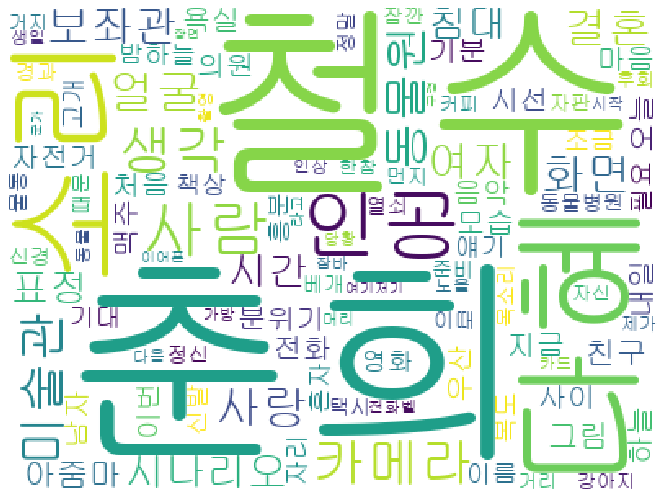

In [7]:
%matplotlib inline
from matplotlib import pyplot
from wordcloud import WordCloud
wc = WordCloud(font_path='C:\\Windows\\Fonts\\NGULIM.ttf',background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis('off')
pyplot.show()

In [8]:
from konlpy.tag import Twitter
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

def sigmoid(x):
    return 1 / (1 + math.e ** -x)

twitter = Twitter()
results = []
lines = articles
words_all = []

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)  
    # 시나리오의 한글 단어들을 다 품사별로 분리 자세한건 print로 보기
#     print(malist)
    r = []
    for word in malist:
        if word[1] in ['Noun', 'Verb', 'Adjective']:
#             print(word[0])
            r.append(word[0])
            words_all.append(word[0])  # words_all은 다 단어로 나뉨
    rl = (' '.join(r)).strip()
    results.append(rl)  # results는 문장별로 나뉨, 
print(results)


C:\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['', '결혼식장', '비디오 카메라 뷰 파인더 보이다 듯 화면', '신부 제 원래 남자 얼굴 좀 밝히다 호호 호 눈 반했어', '신랑 비 오다 걱정 하다 흥행 성공 정말 기쁘다', '상투 주례사 흐르다 결혼식 풍경 보이다 기존 결혼식 비디오 좀 다른 듯 신선하다 엿보다 생생하다 현장 감등 살리다 의도 핸드 헬드 퀵 줌 등 구사 되다 양각 구도 포커스 플레이 등등 다채롭 펼쳐지다 카메라 하객 훑다 갑자기 느리다 화면 변하다 끌 법석 장음 레코드 판이 멈추다 것 뭉개지 사라지다 대신 촬영 하다 사람 긴장 되다 숨소리 심장 박동 소리 느리다 화면 맞추다 늘어지다 깔리다 카메라 남자 보좌 관 얼굴 멈추다', '그 향 하다 줌 인 되다 뭔가 느끼다 카메라 흘낏 보다 계속 그 표정 잡고 있다 그 다시 쳐다보다 제 서다 카메라 급하다 옆 피 그 시선 카메라 따르다 오다 순간 화면 꺼지다 경쾌하다 음악 블루 모노 톤 위로 쓰이다 컬러 제목 미술관 옆 동물원', '음악 다음 장면 계속 흐르다', '결혼식장 복도', '황 급하다 걸다 나오다 금 뱃지 국회의원 주례 선 이 과 보좌 관 굽실 거리 신랑 신부 부모 아깝다 카메라 주시 하다 사람 옆 걷다 있다 들다 바쁘다 카메라 앞 지나치다', '인서트', '컴퓨터 모니터 화면 시나리오 같다 게 뜨다', '춘희 소리 그 내 존재 모르다', '글자 찍히다 속도 느리다 치기 전 화면 바뀌다', '결혼식장 복도', '다른 날 복장 바뀌다 의원 보좌 관 여전하다 바삐 걸다 나오다 있다', '의원 쪽 난리 나다 시간 좀 늦추다 그렇다', '보좌 관 불가능하다 의원님 쪽 사정 있다 하다 또', '의원 그 껀 거절 하다 그렇다', '보좌 관 안되다 의원님 지역구 중요하다 사람 들이다', '의원 짜증 생색 안나 일', '그 카메라 지나치다 멀어지다 간다', '인서트', '켜지다 모니터 앞 두다 공책 시나리오 쓰다 손', '춘희 소리 오늘 그 나르다 보지 하다', '결혼식장 복도', '또 다른 날 바삐 걸다 나오다 의원 보좌 관 승강기 타다', 

In [9]:
from gensim.models import word2vec  # tokenizer된 단어 별 연관성을 찾아서 벡터로 반환
yang_file = 'yang.model'
with open(yang_file, 'w', encoding='utf-8') as fp2:
    fp2.write('\n'.join(results))

fp2.close()

data = word2vec.LineSentence(yang_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)
model.save('uang_w2v.model')

In [10]:
model['결혼']

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.0123345 ,  0.02495136, -0.08463205,  0.11387778,  0.10795918,
       -0.0701068 ,  0.05589073, -0.04598319,  0.02259014, -0.04980994,
        0.1053654 , -0.07583247,  0.10501234, -0.11255181, -0.04938116,
        0.0251569 , -0.03443917,  0.00030852,  0.03729519, -0.01070388,
       -0.00150658, -0.10419291, -0.0857322 ,  0.06664943, -0.17179869,
       -0.05692771,  0.16119038, -0.00263513, -0.02606785,  0.07062076,
       -0.0931179 , -0.13590492, -0.03774467,  0.06473171, -0.03737601,
       -0.03825961, -0.10745063, -0.00542098,  0.0394365 ,  0.09058571,
        0.01677475, -0.00074408,  0.02904058,  0.05146491, -0.06588878,
        0.00538954, -0.03647429, -0.07133897,  0.06103707, -0.05658301,
       -0.10929284,  0.03856972, -0.0412764 , -0.13159998, -0.04417662,
        0.139033  ,  0.15459657,  0.08361601,  0.01262918,  0.16709682,
       -0.08650392, -0.04761038, -0.00862344, -0.00760312, -0.09504198,
        0.01914866, -0.02912831,  0.165382  ,  0.04135829, -0.11

In [11]:
model.most_similar(positive=['춘희'])

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('린다', 0.9965517520904541),
 ('언덕', 0.9964759945869446),
 ('해질녘', 0.9963526725769043),
 ('일어나다', 0.9963252544403076),
 ('위로', 0.9962088465690613),
 ('걷다', 0.9961340427398682),
 ('틀어주다', 0.995749831199646),
 ('빼다', 0.9953610897064209),
 ('내려다보다', 0.9952933192253113),
 ('립', 0.9951901435852051)]

In [12]:
model.most_similar(positive=['철수'])

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('뭐라다', 0.99330735206604),
 ('문', 0.9917154312133789),
 ('마음', 0.9913574457168579),
 ('받치다', 0.9910486340522766),
 ('수도', 0.990874707698822),
 ('물통', 0.9907682538032532),
 ('병', 0.9907317757606506),
 ('깨어나다', 0.9906972646713257),
 ('펴다', 0.9906321167945862),
 ('머리', 0.9902357459068298)]

In [13]:
model.most_similar(positive=['미술관', '여자'], negative=['여자'])

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('서로', 0.9969849586486816),
 ('하얗다', 0.99680495262146),
 ('구경', 0.996549665927887),
 ('용기', 0.9964023232460022),
 ('이정표', 0.9963911771774292),
 ('의아', 0.9961491227149963),
 ('밝아지다', 0.9961159825325012),
 ('불빛', 0.9959498643875122),
 ('뒷모습', 0.9959040880203247),
 ('코뿔소', 0.9957402944564819)]

In [14]:
from IPython.display import Image
from sklearn.decomposition import PCA

words = list(model.wv.vocab)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
print(len(words))

result2 = StandardScaler().fit_transform(result)
db = DBSCAN(eps=0.3, min_samples=10).fit(result2)
labels = db.labels_

print(len(labels))
print(labels.shape)
labels

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


1362
1362
(1362,)


array([ 0,  0, -1, ..., -1,  0,  0], dtype=int64)

In [19]:
import collections
import math
import numpy as np

myCounter = collections.Counter(words_all)
# print(myCounter)

radiuds = np.array([i for i in list(myCounter.values())])
area = np.pi * (radiuds)**2
table_words = list(myCounter.keys())
table_counts = list(list(myCounter.values()))
# table_counts

Counter({'춘희': 607, '철수': 544, '하다': 375, '있다': 210, '다혜': 199, '보다': 187, '그': 154, '그렇다': 145, '인공': 145, '소리': 128, '없다': 83, '듯': 82, '것': 77, '안': 69, '말': 69, '앞': 66, '않다': 65, '사람': 58, '가다': 57, '내': 55, '카메라': 54, '되다': 54, '뭐': 53, '차': 52, '아니다': 51, '오다': 48, '들다': 48, '자다': 48, '생각': 46, '왜': 45, '사랑': 43, '다시': 40, '좋다': 40, '좀': 39, '같다': 39, '또': 38, '방': 38, '더': 38, '보이다': 37, '알다': 37, '너': 37, '얼굴': 36, '나': 36, '관': 34, '난': 34, '별': 34, '때': 33, '모르다': 31, '그녀': 31, '화면': 30, '미술관': 30, '동물원': 30, '어떻다': 30, '앉다': 30, '나오다': 29, '이': 29, '계속': 28, '돼다': 28, '거': 28, '표정': 27, '손': 27, '둘': 27, '내다': 27, '보좌': 26, '빠지다': 26, '바라보다': 26, '그림': 26, '서다': 25, '두다': 25, '쓰다': 25, '저': 25, '건': 25, '지금': 25, '여자': 25, '보고': 25, '치다': 25, '나다': 24, '예': 24, '못': 24, '눈': 23, '쪽': 23, '문': 23, '밤': 23, '해': 23, '자기': 23, '전화': 23, '모습': 23, '정말': 22, '침대': 22, '받다': 22, '넌': 22, '자전거': 22, '옆': 21, '시간': 21, '잡다': 21, '집': 21, '말다': 21, '뒤': 21, '수': 21, '주다': 21, '그게': 

[1.15751667e+06 9.29710364e+05 1.24410211e+05 5.14718540e+04
 6.60519855e+04 1.05683177e+04 6.64761005e+03 9.16088418e+03
 2.82743339e+03 2.82743339e+03 5.80880482e+03 4.07150408e+03
 2.82743339e+03 1.25663706e+03 1.96349541e+03 1.01787602e+03
 1.38544236e+03 2.29022104e+03 1.52053084e+03 8.04247719e+02
 2.12371663e+03 6.15752160e+02 1.52053084e+03 1.25663706e+03
 7.06858347e+02 1.66190251e+03 8.04247719e+02 1.25663706e+03
 9.07920277e+02 6.15752160e+02 1.96349541e+03 1.66190251e+03
 2.54469005e+02 6.15752160e+02 7.06858347e+02 6.15752160e+02
 8.04247719e+02 4.52389342e+02 7.06858347e+02 9.07920277e+02
 8.04247719e+02 4.52389342e+02 5.30929158e+02 6.15752160e+02
 2.01061930e+02 2.82743339e+01 2.54469005e+02 5.30929158e+02
 4.52389342e+02]


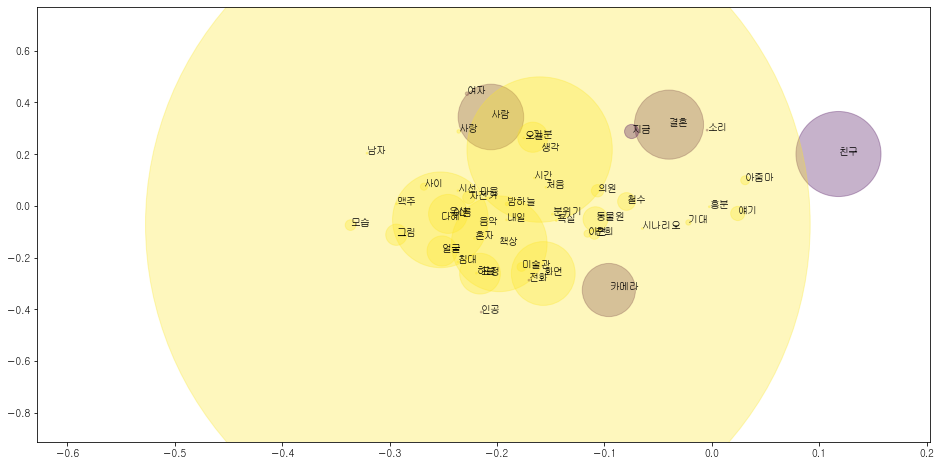

In [27]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm

font_location = 'C:\\Windows\\Fonts\\NGULIM.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# print(words) # 중복 없는 단어들
valid_words = [hot_key[i] for i in range(0,50) if hot_key[i] in words] # hot_key는 명사만, words는 여러가지
# print(len(valid_words))
valid_index = [words.index(str_temp) for str_temp in valid_words]
# print(len(valid_index))
valid_labels = [labels[i]+1 for i in valid_index]
# print(valid_labels)
valid_area = area[[table_words.index(str_temp) for str_temp in valid_words]]
print(valid_area)
zip_index = zip(valid_index,valid_words)

plt.figure(figsize=(16, 8))
plt.scatter(result[valid_index, 0], result[valid_index, 1] , c = valid_labels , s = area , alpha=0.3)
for i, word in zip_index:
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.show()

In [28]:
model.similarity('춘희', '철수')

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9851215

In [29]:
model.similarity('춘희', '인공')

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9367603